# **ML - Home Work #1**

Stav Suzan Rabinovich

## **About the Titanic**
The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, \
leading to the deaths of more than 1,500 passengers and crew. 


![picture](https://media.giphy.com/media/mYeIp5eruF3jy/giphy.gif) \
*this is not the actual Titanic, this gif was taken from the movie.\
\
In this home work I'll analyze and evaluate the surviving rate of people (from given data) on the Titanic.



## **Start, Settings and Data Imports**

In [198]:
# Import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing

# Data import
train_df = pd.read_csv("../input/titanic/train.csv") # DataFrame of train's CSV file (Read)
test_df = pd.read_csv("../input/titanic/test.csv")   # DataFrame of test's CSV file (Read)

## **About the Data**

### **Train Data:**

In [199]:
print('There are {} samples'.format(train_df.shape[0]))  # Number of samples
print('There are {} features'.format(train_df.shape[1])) # Number of features

There are 891 samples
There are 12 features


In [200]:
train_df.head() # Preview of the train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Test Data:**

In [201]:
print('There are {} samples'.format(test_df.shape[0]))  # Number of samples
print('There are {} features'.format(test_df.shape[1])) # Number of features

There are 418 samples
There are 11 features


In [202]:
test_df.head() # Preview of the train data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Intresting info (Train data):**


* There are more male Survivors than female.




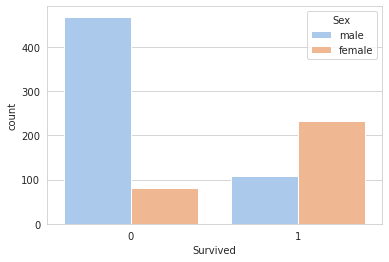

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='pastel')

* There are more Survivors from P3's class then from other classes.

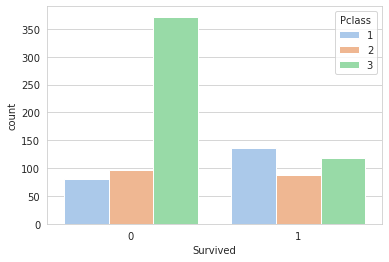

In [204]:
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='pastel')

* Survival Count based on Age


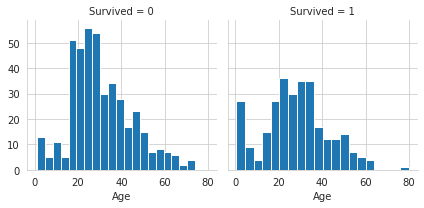

In [205]:
sns.FacetGrid(train_df, col='Survived', palette='pastel').map(plt.hist, 'Age', bins=20)

## **Data Quality & Missing Value Assessment**


In [206]:
# Checking the nuber of missing values in our df
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, There are missing values in Age and Cabin features. \
The Embarked is extrimly low (2 of more than 800), so we will fill this data preposition. \
Let's check if we can use those features: 

### **Cabin**

In [207]:
cabin_mis = (train_df['Cabin'].isnull().sum()/train_df.shape[0])*100
print(f'Percent of missing "Cabin" records is {cabin_mis}')

Percent of missing "Cabin" records is 77.10437710437711


The "Cabin" feature's missing record is to high to estimate - that's why we will *drop* that data 

### **Age**

In [208]:
age_mis = (train_df['Age'].isnull().sum()/train_df.shape[0])*100
print(f'Percent of missing "Age" records is {age_mis}')

Percent of missing "Age" records is 19.865319865319865


The "Age" feature's missing record can be handled.

Age properties:

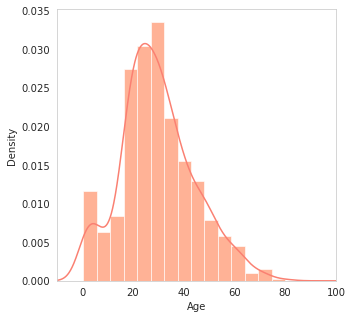

In [209]:
plt.figure(figsize=(5,5))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='coral', alpha=0.6)
train_df["Age"].plot(kind='density', color='salmon')
ax.set(xlabel='Age')
plt.xlim(-10,100)
plt.grid()
plt.show()

In [210]:
age_mean = train_df['Age'].mean(skipna=True) # Age mean
age_median = train_df['Age'].median(skipna=True)
print(f'the mean age in train_df is: {age_mean}')
print(f'the median age in train_df is : {age_median}')

the mean age in train_df is: 29.69911764705882
the median age in train_df is : 28.0


## **Select Relevant Features & Making Final Adjusment**

At this point, we will drop irrellevant data: \
* I'll start by inserting rellevant data to null cabin and embarked.
* To ease, I'll union both SibSp and Parch columns to 1 column - if the person was traveling with a family.
* I will finish by dropping all columns that seems irrellevant to me ( "Name","PassengerId", "Ticket").

In [211]:
train_dat = train_df.copy()
train_dat["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True) 
train_dat["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True) # Insert null ages as median
train_dat.drop('Cabin', axis=1, inplace=True)                              # Drops the Cabin value

train_dat['TravelAlone']=np.where((train_dat["SibSp"]+train_dat["Parch"])>0, 0, 1)
train_dat.drop('SibSp', axis=1, inplace=True)                              
train_dat.drop('Parch', axis=1, inplace=True)

train_t=pd.get_dummies(train_dat, columns=["Pclass","Embarked","Sex"])
train_t.drop('Sex_female', axis=1, inplace=True)
train_t.drop('PassengerId', axis=1, inplace=True)
train_t.drop('Name', axis=1, inplace=True)
train_t.drop('Ticket', axis=1, inplace=True)

train_fin = train_t
train_fin.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


## **Exploring Data**

### **Exploring Survival Rate (by Age)**

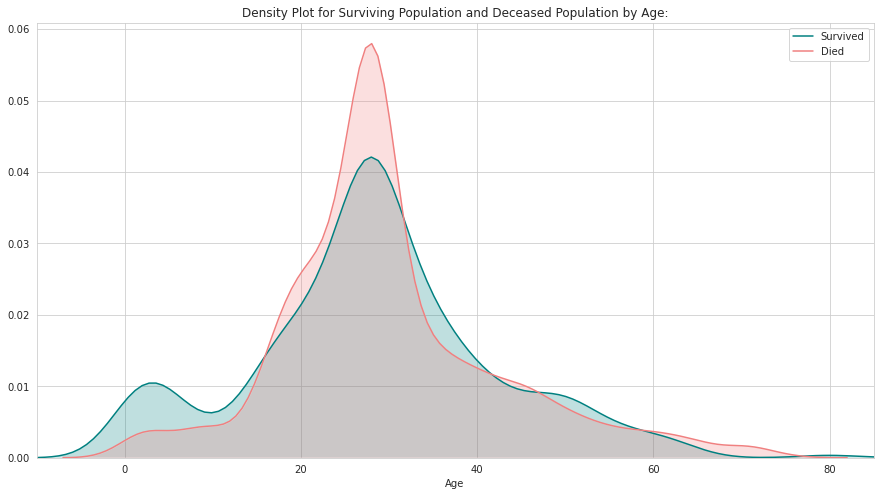

In [212]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_fin["Age"][train_fin.Survived == 1], color="teal", shade=True)
sns.kdeplot(train_fin["Age"][train_fin.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot for Surviving Population and Deceased Population by Age:')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Over all ages distibution, the survival chances are relatively similar,
but at ages 16 or lower the chances of survival are better.\
The reason might be caused by the fact that *kids's ability to embrace changes* is better than adults ability, \
or because most kids (if not all of them) came to the cruise with their families, *so their parents took care of them first*. 

### **Exploring Survival Rate (by fare cost)**


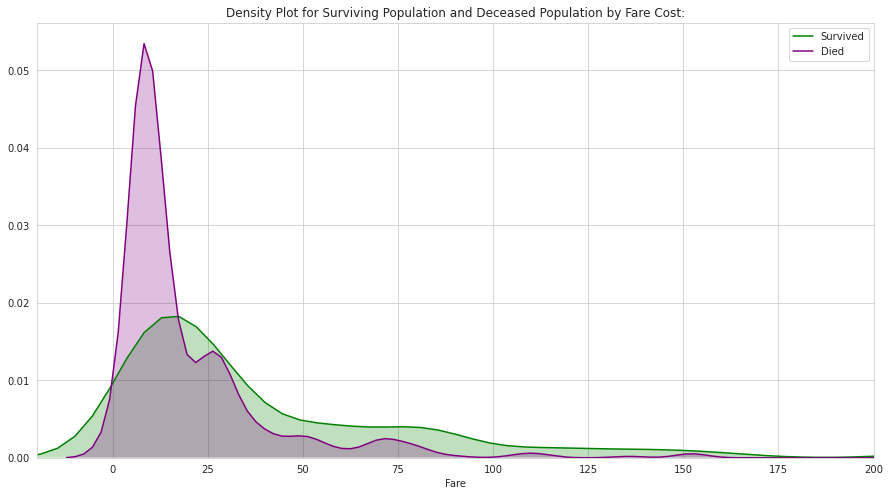

In [213]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_fin["Fare"][train_fin.Survived == 1], color="green", shade=True)
sns.kdeplot(train_fin["Fare"][train_fin.Survived == 0],color="purple", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot for Surviving Population and Deceased Population by Fare Cost:')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### **Exploring Survival Rate (by Classes)**

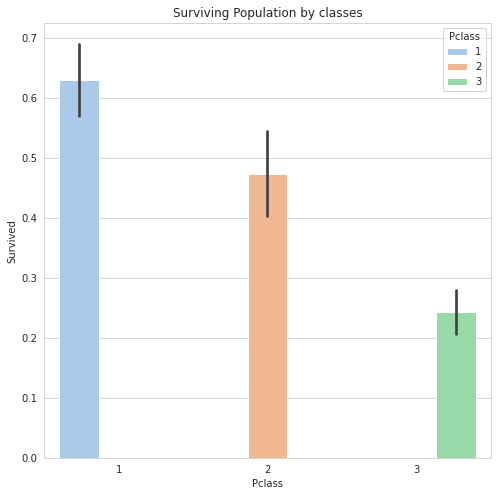

In [214]:
plt.figure(figsize=(8,8))
plt.title("Surviving Population by classes")
sns.barplot('Pclass', 'Survived', data=train_df, palette="pastel", hue="Pclass")

As we can see, 1st class population, have better chance to survive.

### **Exploring Survival Rate (by Gender)**

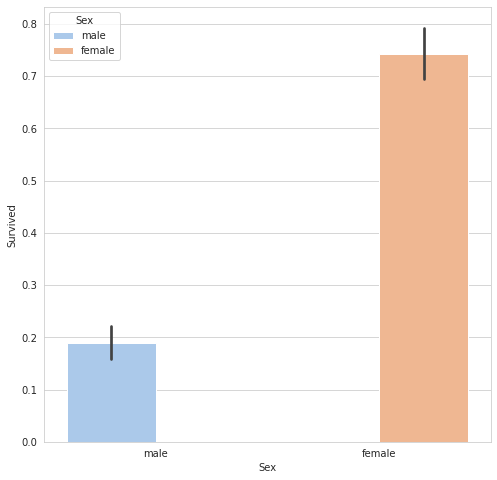

In [215]:
plt.figure(figsize=(8,8))
sns.barplot('Sex', 'Survived', data=train_df, palette="pastel", hue="Sex")
plt.show()

### **Explore Survival Rate (by Embarked Port)**

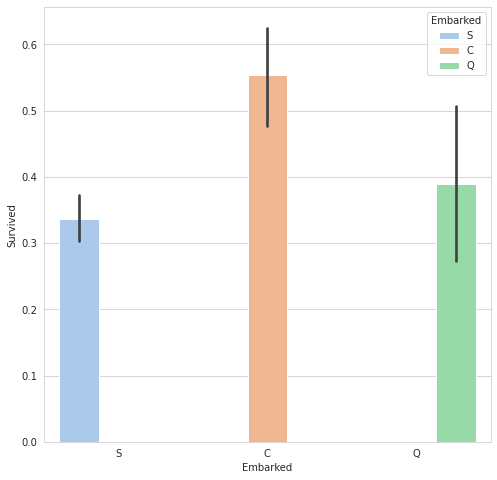

In [216]:
plt.figure(figsize=(8,8))
sns.barplot('Embarked', 'Survived', data=train_df, palette="pastel", hue="Embarked")
plt.show()

In [217]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

If you came from Cherbourg there your chances to survive are bigger \
then the other Embarked ports, but least of the people embarked from Cherbourg.

### **Explore Survival Rate (by Traveling Alone)**

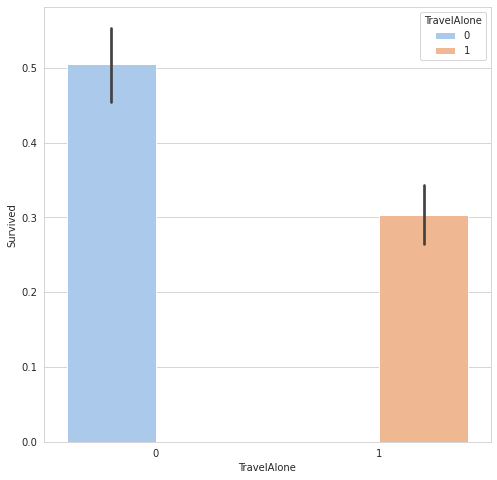

In [218]:
plt.figure(figsize=(8,8))
sns.barplot('TravelAlone', 'Survived', data=train_fin, palette="pastel", hue="TravelAlone")
plt.show()

It's seems like your chances to survive is if you came with a family.

## **Correlation**


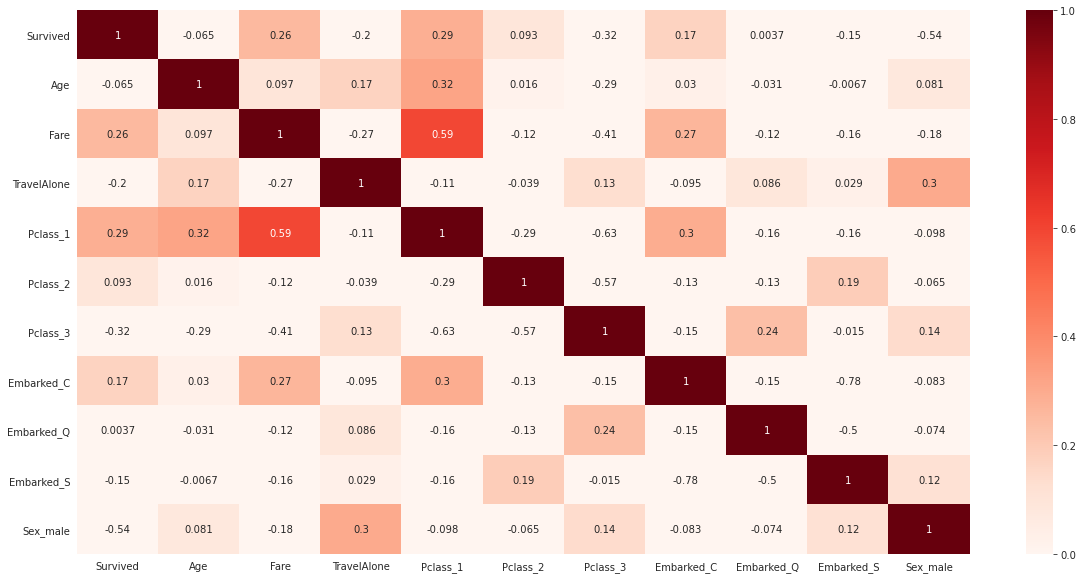

In [219]:
plt.figure(figsize=(20,10))
cor = train_fin.corr()
train_df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Reds, vmin=0, vmax=1)
plt.show()

We can notice strong correlation between some fatures: \
* Fare and Pclass_1 |0.59|
* Age and Pclass_1 |0.32|
* Survived and Sex_male |-0.54|
* Sex_male and TravelAlone |0.3| 


We could see strong relatinship between difftent fetures, such as: 
* Most of people who bught more expansive tickets are in Pclass_1.
* People who paid higher fare has better surviving rate.
* It's more likely that men are traveling alone then women.
* Women has have better surviving rate.

## **Preparing the Test Set**

In [220]:
test_dat = test_df.copy()

# Filling missing values 
test_dat["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_dat["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)

test_dat.drop('Cabin', axis=1, inplace=True) # Dropping Cabin column 
# Drop SibSp and Parch columns from the table and make TravelAlone column
test_dat['TravelAlone']=np.where((test_dat["SibSp"]+test_dat["Parch"])>0, 0, 1)
test_dat.drop('SibSp', axis=1, inplace=True)
test_dat.drop('Parch', axis=1, inplace=True)

test_t = pd.get_dummies(test_dat, columns=["Pclass","Embarked","Sex"])
test_t.drop('Sex_female', axis=1, inplace=True)
test_t.drop('PassengerId', axis=1, inplace=True)
test_t.drop('Name', axis=1, inplace=True)
test_t.drop('Ticket', axis=1, inplace=True)

# Final data
test_fin = test_t
test_fin.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [221]:
test_fin.drop('Embarked_S', axis=1, inplace=True)
test_fin.drop('Pclass_2', axis=1, inplace=True)

train_fin.drop('Embarked_S', axis=1, inplace=True)
train_fin.drop('Pclass_2', axis=1, inplace=True)

In [222]:
from sklearn import model_selection
t = train_fin['Survived']
x = train_fin.drop('Survived', axis=1)
print('x values:')
display(x)
print('t values:')
display(t)

x values:


,Age,Fare,TravelAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_Q,Sex_male
0,22.0,7.2500,0,0,1,0,0,1
1,38.0,71.2833,0,1,0,1,0,0
2,26.0,7.9250,1,0,1,0,0,0
3,35.0,53.1000,0,1,0,0,0,0
4,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,0,0,0,1
887,19.0,30.0000,1,1,0,0,0,0
888,28.0,23.4500,0,0,1,0,0,0
889,26.0,30.0000,1,1,0,1,0,1


t values:


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [223]:
x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=0.2, random_state=2)
print('x_train')
display(x_train)
print()
print('t_train')
display(t_train)
print()
print('x_val')
display(x_val)
print()
print('t_val')
display(t_val)

x_train


,Age,Fare,TravelAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_Q,Sex_male
30,40.0,27.7208,1,1,0,1,0,1
10,4.0,16.7000,0,0,1,0,0,0
873,47.0,9.0000,1,0,1,0,0,1
182,9.0,31.3875,0,0,1,0,0,1
876,20.0,9.8458,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
534,30.0,8.6625,1,0,1,0,0,0
584,28.0,8.7125,1,0,1,1,0,1
493,71.0,49.5042,1,1,0,1,0,1
527,28.0,221.7792,1,1,0,0,0,1



t_train


30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64


x_val


,Age,Fare,TravelAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_Q,Sex_male
707,42.0,26.2875,1,1,0,0,0,1
37,21.0,8.0500,1,0,1,0,0,1
615,24.0,65.0000,0,0,0,0,0,0
169,28.0,56.4958,1,0,1,0,0,1
68,17.0,7.9250,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
89,24.0,8.0500,1,0,1,0,0,1
80,22.0,9.0000,1,0,1,0,0,1
846,28.0,69.5500,0,0,1,0,0,1
870,26.0,7.8958,1,0,1,0,0,1



t_val


707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64

In [224]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
y_train_prob = SGD_cls.predict_proba(x_train)
y_test_prob = SGD_cls.predict_proba(x_val)
y_train = SGD_cls.predict(x_train)
y_test = SGD_cls.predict(x_val)
print('First 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('First 5 predictions of y_train:')
print(y_train[:5])
print()
print('First 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('First 5 predictions of y_test:')
print(y_test[:5])

First 5 probabilities of y_train_prob:
[[0.58762248 0.41237752]
 [0.29715841 0.70284159]
 [0.96706528 0.03293472]
 [0.87605057 0.12394943]
 [0.91596653 0.08403347]]

First 5 predictions of y_train:
[0 1 0 0 0]

First 5 probabilities of y_test_prob:
[[0.70246165 0.29753835]
 [0.9189123  0.0810877 ]
 [0.1663213  0.8336787 ]
 [0.93239791 0.06760209]
 [0.40773539 0.59226461]]

First 5 predictions of y_test:
[0 0 1 0 1]


## **The Final Test**

In [225]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression()).fit(x_train, t_train)
y_train_prob = SGD_cls.predict_proba(x_train)
y_test_prob = SGD_cls.predict_proba(x_val)
y_train = SGD_cls.predict(x_train)
y_test = SGD_cls.predict(x_val)
print('First 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('First 5 predictions of y_train:')
print(y_train[:5])
print()
print('First 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('First 5 predictions of y_test:')
print(y_test[:5])

First 5 probabilities of y_train_prob:
[[0.57982924 0.42017076]
 [0.292534   0.707466  ]
 [0.96715203 0.03284797]
 [0.87364071 0.12635929]
 [0.91507692 0.08492308]]

First 5 predictions of y_train:
[0 1 0 0 0]

First 5 probabilities of y_test_prob:
[[0.70535541 0.29464459]
 [0.91800891 0.08199109]
 [0.17289253 0.82710747]
 [0.9337481  0.0662519 ]
 [0.40278266 0.59721734]]

First 5 predictions of y_test:
[0 0 1 0 1]


In [226]:
print('Accuracy score on train', SGD_cls.score(x_train, t_train))
print('Accuracy score on test', SGD_cls.score(x_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.8089887640449438
Accuracy score on test 0.7821229050279329

CE on train 0.4347331195067922
CE on test 0.508332061994269


In [227]:
from sklearn import *
passenger_id = test_df['PassengerId'].values
y_test = SGD_cls.predict(test_fin)
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived':y_test})
submission.to_csv("submission_last.csv", index=False)

## **Results**


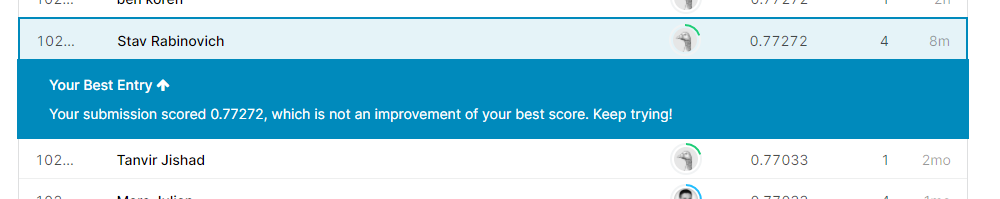


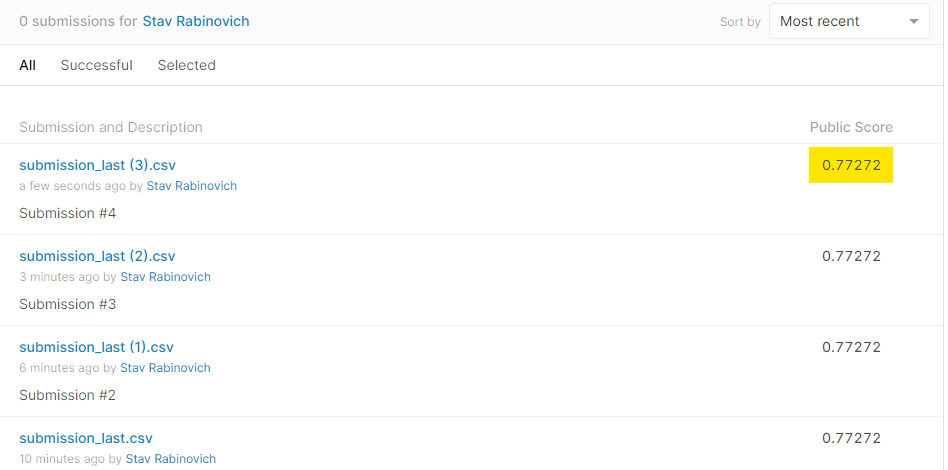

This HW explored the survival rate of people on the Titanic.\
Some features helped were dropped durring test preparing and some were added by estimination.
I tried to estimate the survival rate of people on the Titcanic by test that I did. 
This HW helped me to understand the subject and I feel more connected to the metirial.

## **References :**

About the titanic - [History.com](https://www.history.com/topics/early-20th-century-us/titanic) \
Seaborn options - [Seaborn.pydata.org](https://seaborn.pydata.org/tutorial/color_palettes.html) \
Those notebooks helped me to explore the data - [Notebook1](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python#2.-Data-Quality-&-Missing-Value-Assessment) & [Notebook2](https://www.kaggle.com/padmanabhabanerjee/a-noob-s-first-approach-to-the-titanic-dataset#Playing-with-data-:)



